# Tarea 5. Optimización
Guillermo Segura Gómez

## Ejercicio 1

**1. Encuentre y clasifique los puntos estacionarios para la función**

$$
f(\mathbf{x}) = x_1^2 - x_2^2 + x_3^2 - 2x_1x_3 - x_2x_3 + 4x_1 + 12. 
$$

Los puntos estacionarios de una función son aquellos puntos en los que la primera derivada o el gradiente, de la función es igual a cero. Son los puntos donde la pendiente de la función es cero. Para encontrar los puntos estacionarios, podemos definir la función gradiente y encontrar los valores para los cuales la función es igual a cero. El gradiente de una función $f$ de tres variables es igual a

$$
\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3} \right]
$$

Derivando, el gradiente es igual a 

$$
\nabla f(\mathbf{x}) = \left[ 2x_1 - 2x_3 + 4, -2x_2 - x_3, -2x_1 - x_2 + 2x_3 \right] 
$$

Podemos expresar el gradiente como una matriz de tres ecuaciones con tres incógnitas

$$
\begin{bmatrix}
2 & 0 & -2 \\
0 & -2 & -1 \\
-2 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} = 
\begin{bmatrix}
4 \\
0 \\
0
\end{bmatrix}
$$

Solucionar este sistema $Ax = b$ es similar a encontrar los puntos estacionarios de la función. Podemos utilizar cualquier método de solución de matrices, pero es un sistema muy simple, la solución se puede encontrar a mano. 

De la primera ecuación encontramos $x_1 = x_3 - 2$.
De la segunda ecuación encontramos $x_2 = -\frac{1}{2}x_3$

Sustituyendo en la ecuación 3 encontramos que $x_3 = -8$. Por lo tanto, $x_1 = -10$ y $x_2 = 4$. La función tiene un único punto estacionario.

$$
x = (-10, 4, -8)
$$

Para clasificar el punto estacionario $(-10, 4, -8)$ de la función $f(\mathbf{x})$, necesitamos evaluar el Hessiano de $f$ en este punto. Para una función de tres variables $f(x_1, x_2, x_3)$, la hessiana se define:

$$
H = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \frac{\partial^2 f}{\partial x_1 \partial x_3} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \frac{\partial^2 f}{\partial x_2 \partial x_3} \\ \frac{\partial^2 f}{\partial x_3 \partial x_1} & \frac{\partial^2 f}{\partial x_3 \partial x_2} & \frac{\partial^2 f}{\partial x_3^2} \end{bmatrix}
$$

Calculando la hessiana de $f$ en el punto estacionario $(-10, 4, -8)$ es:

$$
H = \begin{bmatrix} 2 & 0 & -2 \\ 0 & -2 & -1 \\ -2 & -1 & 2 \end{bmatrix}
$$

Para clasificar el punto estacionario, necesitamos examinar los valores propios de la matriz hessiana. La naturaleza del punto estacionario está determinada por el signo de los valores propios:

- Si todos los valores propios son positivos, el punto estacionario es un mínimo local.
- Si todos los valores propios son negativos, el punto estacionario es un máximo local.
- Si los valores propios son de signos mixtos, el punto estacionario es un punto de silla.

Calculando los valores propios de la matriz.

In [50]:
import numpy as np

# Matrix hessiana
H = np.array([[2,0,-2],[0,-2,-1],[-2,-1,2]])

print("Los eigenvalores de la matriz Hessiana son:")
eigenvalues, eigecvectors = np.linalg.eig(H)
print(eigenvalues)

Los eigenvalores de la matriz Hessiana son:
[ 4.08387236  0.21319818 -2.29707054]


Por lo que encontramos, los valores propios son mixtos, por lo que el punto estacionario $(-10, 4, -8)$ es un **punto silla**.

**2. Sea $\mathbf{x}_0 = (1,0,0)^\top$. Calcule el punto $\mathbf{x}_1$ usando la dirección de descenso máximo con paso exacto.**

Para calcular el punto $\mathbf{x}_1$ usando la dirección de descenso máximo con paso exacto desde el punto inicial $\mathbf{x}_0 = (1,0,0)^\top$, necesitamos determinar la dirección de descenso máximo, luego calcular el tama;o de paso exacto y finalmente calcular $x_1$. 

La dirección de descenso máximo en un punto dado es opuesta al gradiente de la función en ese punto. para {x}_0 = (1,0,0), evaluando en la funcion gradiente calculada en el ejercicio pasado.

$$
\nabla f(1,0,0) = \left[ 2x_1 - 2x_3 + 4, -2x_2 - x_3, -2x_1 - x_2 + 2x_3 \right] 
$$

El gradiente de f evaluado en ese punto $\nabla f(1,0,0) = (6, 0, -2)$, por lo que la direccion de descenso maximo es: $-\nabla f(x) = (-6, 0, 2)$.

Ahora, para calcular el tamaño de paso exacto, necesitamos encontrar el valor de $\alpha$ que minimiza la función $f$ a lo largo de la dirección de descenso máximo. Para esto, evaluamos la funcion en el punto $x_0$ y minimizamos la funcion 

$$
f(x_0 - \alpha \nabla f(x_0))
$$

Sustituyendo la direccion de descenso calculada

$$
f(x_0 - \alpha \nabla f(x_0)) = f(1-6\alpha, 0, 2\alpha)
$$

Se sigue con el algebra, y encontramos

$$
f(x_0 - \alpha \nabla f(x_0)) = 64 \alpha^2 - 40 \alpha +17
$$

Ahora minimizamos la funcion para $\alpha$. Encontramos la derivada

$$
\frac{\partial f}{\partial \alpha} = 128 \alpha - 40 = 0 \qquad \alpha = \frac{5}{16}
$$

Una vez que tenemos la dirección de descenso y el tamaño de paso exacto, actualizamos el punto inicial para obtener el nuevo punto $\mathbf{x}_1$ mediante la fórmula $\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$.

Entonces

$$ 
\mathbf{x}_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} - \frac{5}{16} \begin{bmatrix} 6 \\ 0 \\ -2 \end{bmatrix} 
$$

Finalmente 
$$
\mathbf{x}_1 = \left(-\frac{7}{8}, 0, \frac{5}{8} \right)^T
$$

## Ejercicio 2

Considere la función

$$
f(\mathbf{x}) = 2x_1^2 + x_2^2 - 2x_1x_2 + 2x_1^3 + x_1^4
$$

Sea $\mathbf{x}_0 = (0,1)^\top$

**1. Aplique un paso del método de Newton a partir del punto si la Hessiana en $\mathbf{x}_0$ es definida positiva. Si no, aplique el algoritmo de descenso máximo con un tamaño de paso apropiado.**

Para definir que algoritmo debemos de utilizar, primero hay que calcular el gradiente y la hessiana de la función $f$. 
Calculando el gradiente:

$$
\nabla f = \left[ 4x_1^3 + 6x_1^2 + 4x_1 - 2x_2, -2x_1 + 2x_2 \right] 
$$

Y la Hessiana de la función es:

$$ 
H = \begin{bmatrix} 12x_1^2 + 12x_1 + 4 & -2 \\ -2 & 2 \end{bmatrix} 
$$

Para determinar si la hessiana es definida positiva en el punto $\mathbf{x}_0 = (0,1)^\top$, evaluamos la matriz y calculamos los valores propios. Una matriz es definida positiva si y solo si todos los valores propios son positivos. 

Calculando la hessiana:
$$ 
H(0,1) = \begin{bmatrix}  4 & -2 \\ -2 & 2 \end{bmatrix} 
$$

Ahora, encontremos sus eigenvalores. Utilizamos la función `eigen` de la libería `numpy`para simplificar los cálculos, como en el ejercicio pasado. 

In [51]:
# Calculo de eigenvalores
H = np.array([[4, -2], [-2, 2]])

print("Los eigenvalores de la matriz Hessiana son:")
eigenvalues, eigecvectors = np.linalg.eig(H)
print(eigenvalues)

Los eigenvalores de la matriz Hessiana son:
[5.23606798 0.76393202]


Ya que los eigenvalores son positivos, la matriz es definida positiva, por lo que podemos aplicar el método de Newton. El método de Newton es el siguiente:

Algoritmo 1: Metodo de Newton (Puro)
Entrada: Dada $f : R^n \rightarrow R$ de clase $C^2$, su funcion gradiente $\nabla f(x)$, su funcion Hessiana $\nabla^2 f(x)$, un punto inicial x0, una tolerancia $\tau > 0$ y numero máximo de iteraciones N.
Resultado: El punto xk.

for k = 0, 1, 2, ..., N − 1 do:

-  Calcular el gradiente gk = ∇f(xk );
-  if $|gk| < \tau$ then
        Terminar devolviendo xk ;
    end
- Calcular la Hessiana $H_k = \nabla^2 f(xk)$;
- Resolver el sistema $H_k p^N_k = −g_k$ (sin importar si la matriz es definida positiva);
- Calcular $x_{k+1} = x_k + p^N_k$ ;
- end

El paso siguiente es resolver el sistema $H_k p^N_k = −g_k$. Primero calculamos $g_k$.

$$
-\nabla f(0, 1) = -\left[ 4x_1^3 + 6x_1^2 + 4x_1 - 2x_2, -2x_1 + 2x_2 \right] = [-2, 2]
$$

Ahora resolvemos el sistema para encontrar $p_k$. El algoritmo de Newton, toma como $p_k$ la solución al sistema $H_k p^N_k = −g_k$ determinado por la hessiana, mientras que los métodos de descenso con cálculo de $\alpha$ toman $p_k$ como la dirección de descenso, es decir, $p_k = -\nabla f(x)$.

$$ 
\begin{bmatrix}  4 & -2 \\ -2 & 2 \end{bmatrix} 
\begin{bmatrix} p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} -2 \\ 2 \end{bmatrix}
$$

Es un sistema muy simple, resolviendo por sustitución $p_1 = (2p_2 - 2)/4$. Entonces si remplazamos el valor de $p_1$ en la segunda ecuación
$$
(2 - 2p_2)/2 + 2p_2 = 2 \quad \therefore \quad p_2 = -1 \qquad p_1 = 0
$$

Ahora calculamos 

$$
x_{k+1} = x_0 + p_k = [0, 1]^T + [0, -1]^T = [0, 0]^T
$$

Si programamos la función que haga esto. Utilizamos backtracking para calcular la $\alpha$.

In [52]:
# Función para calcular el tamaño de alpha
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

# Función para revisar si una matriz es definida positiva
def is_positive_definite_cholesky(M):
    try:
        L = np.linalg.cholesky(M)
        return True, L
    except np.linalg.LinAlgError:
        return False, None

In [77]:
def NewtonODesc(f, gradf, hesf, x0, tau, nMax, alpha_0, rho, c1, nBack):

    xk = np.array(x0)
    sequence = []

    for k in range(nMax):
        
        # Calcular el gradiente
        gk = gradf(xk)

        
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence
        
        # Calcular la Hessiana en el punto xk
        H = hesf(xk)

        # Intenta calcular la factorización Cholesky para verificar si la matriz es definida positiva
        condition, L = is_positive_definite_cholesky(H)
        if not condition:
            # Si la matriz no es definida positiva, ejecutamos el método del descenso máximo
            
            # Calcular el tamaño de paso utilizando backtracking
            alpha_k, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, -gk, nBack)

            # Actualizar xk para la siguiente iteración
            xk = xk + alpha_k * (-gk)


        else:
            # Si la matriz es definida positiva seguimos con el método de Newton

            # Resuelve el sistema lineal para encontrar la dirección pk
            y = np.linalg.solve(L, -gk)
            pk = np.linalg.solve(L.T, y)

            # Actualizar xk
            xk = xk + pk

            # Guardar la secuencia de puntos si la dimensión de x es 2
            if len(xk) == 2:
                sequence.append(xk.tolist())

    return xk, nMax, False, gk, sequence

**2. Calcule el cambio de la función objetivo:$f(\mathbf{x}_1) - f(\mathbf{x}_0)$.**

Para evaluar el cambio sustituimos el punto calculado en la función.

In [78]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 2*x1*+2 + x2**2 - 2*x1*x2 + 2*x1**3 + x1**4

In [83]:
x_0 = np.array([0, 1])
x_1 = np.array([0,-1])

print(f"El cambio en la función objetivo es f(x1) - f(x0) = {f(x_1)}  - {f(x_0)} = ", f(x_1) - f(x_0))

El cambio en la función objetivo es f(x1) - f(x0) = 1  - 1 =  0


Probamos la función. Definimos su gradiente y su hessiana:

In [64]:
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([4*x1**3 + 6*x1**2 + 4*x1 - 2*x2, -2*x1 + 2*x2])

def hessian_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([[12*x1**2 + 12*x1 + 4, -2],[-2, 2]])

In [65]:
import matplotlib.pyplot as plt

# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función f:
[[ 4. -2.]
 [-2.  2.]]
[ 0. -1.]
Resultado para x0 = [0. 1.]:
xk = [0. 0.], k = 1, f(xk) = 0.0, |Grad f(xk)| = 0.0
Convergió: True
Secuencia de puntos: [[0.0, 0.0]]


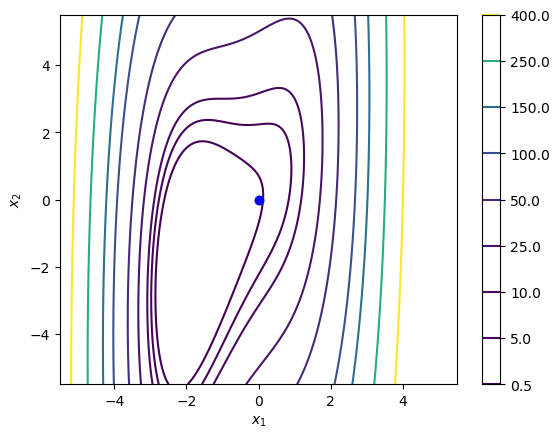

In [76]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_f= [np.array([0.0, 1.0])]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.1

# Número máximo de iteraciones
NMax = 1000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, gradiente, secuencia = NewtonODesc(func, grad_func, hess_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función f:")
probar_newton(f, grad_f, hessian_f, puntos_iniciales_f)

## Ejercicio 3

Supongamos que $f_1, f_2: \mathbb{R}^n \rightarrow \mathbb{R}$ son funciones convexas.
   
1. Muestre que también es convexa la función $f(\mathbf{x})$
   definida como
   
$$
f(\mathbf{x}) = \max\{f_1(\mathbf{x}), f_2(\mathbf{x}) \}.
$$

2. Si $n=1$ y $f_1(-0.4) = 0.36$,
  $f_1(0.6) = 2.56$,$f_2(-0.4) = 3.66$ y $f_2(1) = 2$, identifique 
   el intervalo más pequeño en el que se puede garantizar que se 
   encuentra el minimizador de la función $f(x)$. 
   Explique su respuesta.

## Ejercicio 4 (3 puntos)

Programe el método de región de confianza (MRC) que usa como 
aproximación del subproblema de optimización al punto de Cauchy,
descrito en la Clase 13 en el Algoritmo 3.


1. Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, en 
   la función que implementa el algoritmo se crea un arreglo$\mathbf{M}$ 
   en el que se guarda los puntos$\mathbf{x}_0, \mathbf{x}_1,
   ..., \mathbf{x}_k$ generados. Si $n>2$, definir $\mathbf{M}$ como $None$.

   La función debe devolver el último valor$k$,$\mathbf{x}_k$, 
  $\mathbf{g}_k$y $\mathbf{M}$.

2. Pruebe el algoritmo en la siguientes funciones, fijando 
   la cantidad de iteraciones máximas$N=50000$,$\Delta_{\min}=10^{-5}$,$\eta=0.25$
   y la tolerancia 
  $\tau = \sqrt{n\epsilon_m}$, donde$\epsilon_m$es el épsilon de máquina,
   excepto para la función Hartmann para la cual es mejor usar una tolerancia más 
   grande, como $\tau = \sqrt{n}\epsilon_m^{1/3}$.
   Use los puntos iniciales siguientes y pruebe dos valores para el radio de 
   la región de confianza$\Delta_{\max}=4$ y $\Delta_{\max}=0.25$.
   

**Función de Himmelblau** 
-$\mathbf{x}_0 = (2,4)$


**Función de Beale**
-$\mathbf{x}_0 = (2,3)$ 


**Función de Rosenbrock**
-$\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$ 
-$\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$ 
-$\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$


**Función de Hartmann de dimensión 6**
-$\mathbf{x}_0 = (0,0,0,0,0,0)$


En cada caso imprima los resultados:
- El número de iteraciones realizadas$k$
- El punto$\mathbf{x}_k$obtenido
-$f(\mathbf{x}_k)$
-$\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.
  